In [22]:
import time
from datetime import datetime
import pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Measure python time accuracy on windows (microseconds)

## time.time

In [23]:
t0 = time.time()
time.sleep(1)
t1 = time.time()
t1 - t0

1.01082444190979

Text(0.5, 1.0, 'Histogram of time deltas')

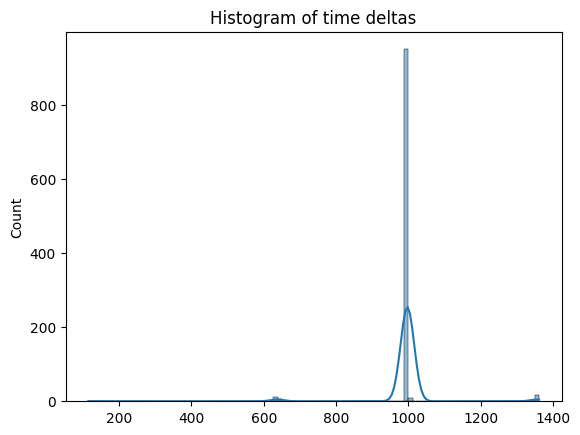

In [24]:
# measure the smallest time delta by spinning until the time changes
def measure_time():
    t0 = time.time()
    t1 = t0
    while t1 == t0:
        t1 = time.time()
    return t1-t0

samples_time = [measure_time() / 1e-6 for i in range(1000)]
sns.histplot(samples_time, bins=100, kde=True)
plt.title('Histogram of time deltas')

## Perf counter

In [25]:
t0 = time.perf_counter()
time.sleep(1)
t1 = time.perf_counter()
t1 - t0

1.0024870999999962

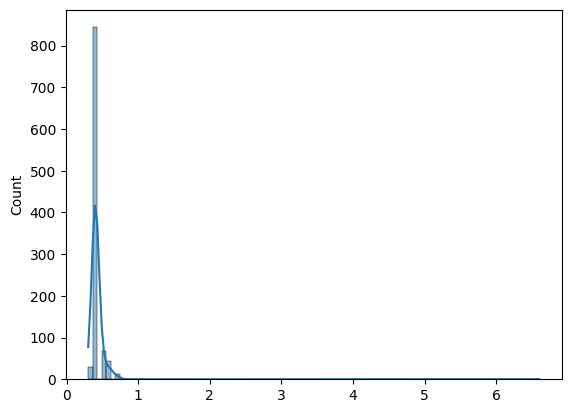

In [26]:
# measure the smallest time delta by spinning until the time changes
def measure_perf_counter():
    t0 = time.perf_counter()
    t1 = t0
    while t1 == t0:
        t1 = time.perf_counter()
    return t1-t0

samples_perf_counter = [measure_perf_counter() / 1e-6 for i in range(1000)]
sns.histplot(samples_perf_counter, bins=100, kde=True)
plt.show()

## Datetime.now()

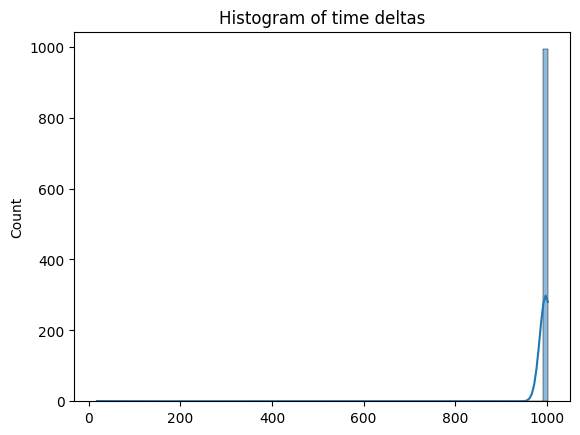

In [34]:
# measure the smallest time delta by spinning until the time changes
def measure_datetime():
    t0 = datetime.now()
    t1 = t0
    while t1 == t0:
        t1 = datetime.now()
    return t1-t0

samples_datetime = [measure_datetime().microseconds for i in range(1000)]
sns.histplot(samples_datetime, bins=100, kde=True)
plt.title('Histogram of time deltas')
plt.show()

## Time monotonic

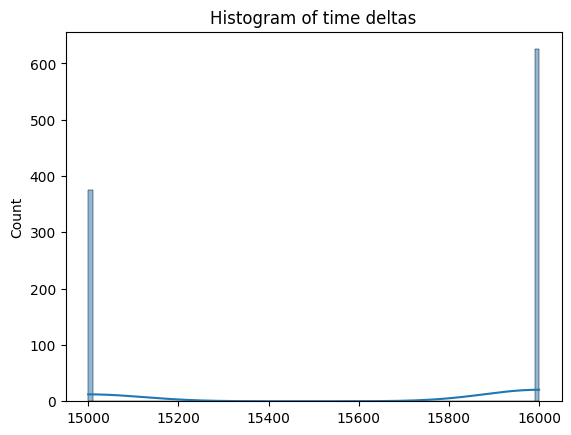

In [35]:
# measure the smallest time delta by spinning until the time changes
def measure_monotonic():
    t0 = time.monotonic()
    t1 = t0
    while t1 == t0:
        t1 = time.monotonic()
    return t1-t0

samples_monotonic = [measure_monotonic() / 1e-6 for i in range(1000)]
sns.histplot(samples_monotonic, bins=100, kde=True)
plt.title('Histogram of time deltas')
plt.show()

## Conclusion
### Use only perf_counter() for timinig in Windows

In [37]:
import pandas as pd

df = pd.DataFrame({
    'time': samples_time,
    'time_datetime': samples_datetime,
    'time_perf_counter': samples_perf_counter,
    'time_monotonic': samples_monotonic,
})
df

,time,time_datetime,time_perf_counter,time_monotonic
0,1000.404358,998,1.0,15000.000000
1,1356.124878,997,0.5,16000.000000
2,636.100769,999,0.4,16000.000001
3,997.543335,997,0.4,14999.999999
4,999.927521,998,0.4,16000.000001
...,...,...,...,...
995,997.304916,997,0.4,14999.999999
996,997.543335,998,0.4,16000.000001
997,997.304916,997,0.4,16000.000000
998,997.304916,997,0.4,15000.000000


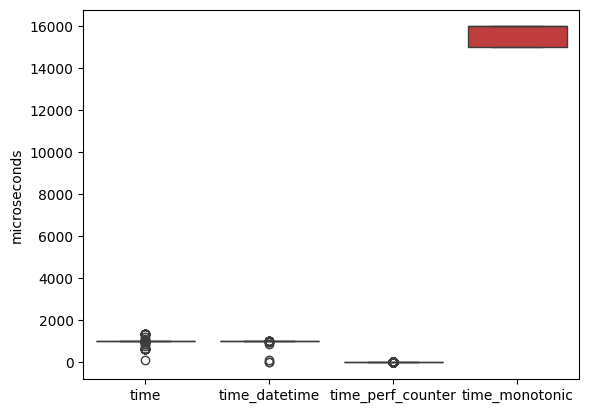

In [41]:
sns.boxplot(df)
plt.ylabel('microseconds')
plt.show()

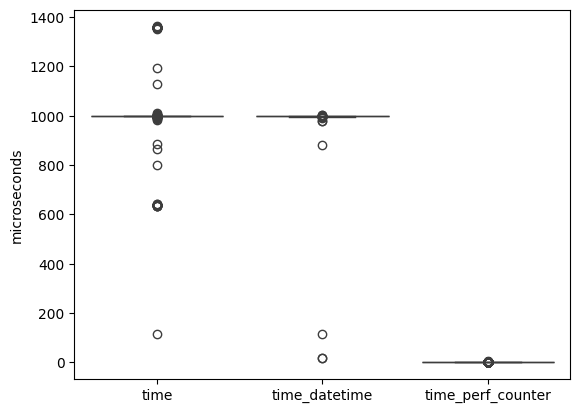

In [43]:
sns.boxplot(df.drop(columns=['time_monotonic']))
plt.ylabel('microseconds')
plt.show()